**Logistic Regression for Sentimental Analysis**

To implement Logistic Regression for sentiments on tweets.

# Steps

* Load the Dataset (includes positive and negative tweets) 
* Preprocess the dataset > 
** remove symbels,hashtag etc
** tokenizer
** check tokens whether in stopwords or puctuation
** if not in above > stem > store in cleaned list
** count > {(word,sentiment):counts,.........}
* Logistic Regression 
* Training
* Test

# 1.Dataset

In [2]:
# load the positive and negative tweets
from google.colab import files
uploaded=files.upload()

Saving negative_tweets.json to negative_tweets.json
Saving positive_tweets.json to positive_tweets.json


In [6]:
import nltk
nltk.download('twitter_samples')
from nltk.corpus import twitter_samples
positive_tweets=twitter_samples.strings('positive_tweets.json')
negative_tweets=twitter_samples.strings('negative_tweets.json')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


In [7]:
#length and types

print('size of positive tweets',len(positive_tweets))
print('type of positive tweets',type(positive_tweets))
print('\nsize of negative tweets',len(negative_tweets))
print('type of positive tweets',type(positive_tweets))

size of positive tweets 5000
type of positive tweets <class 'list'>

size of negative tweets 5000
type of positive tweets <class 'list'>


In [8]:
positive_tweets[4]

'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days'

In [9]:
negative_tweets[8]

'why?:("@tahuodyy: sialan:( https://t.co/Hv1i0xcrL2"'

# Preprocessing Dataset

train-test-split

In [10]:
#here we have 5000 positive tweets and 5000 negative tweets 
# 80% train .....4000+4000 > 8000
# 20% test.......1000+1000 > 2000

In [11]:
train_x=positive_tweets[:4000]+negative_tweets[:4000]
test_x=positive_tweets[4000:]+negative_tweets[4000:]

import numpy as np
train_y=np.append(np.ones((len(positive_tweets[:4000]),1)),np.zeros((len(negative_tweets[:4000]),1)),axis=0)
test_y=np.append(np.ones((len(positive_tweets[4000:]),1)),np.zeros((len(negative_tweets[4000:]),1)),axis=0)

In [12]:
#shape of each

print('size of train x :',len(train_x))
print('size of test x :',len(test_x))
print('\nsize of train y :',train_y.shape)
print('size of test y :',test_y.shape)

size of train x : 8000
size of test x : 2000

size of train y : (8000, 1)
size of test y : (2000, 1)


In [13]:
test_y

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [14]:
train_y

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

Process

In [15]:
from google.colab import files
uploaded=files.upload()

Saving english to english


In [19]:
import string
import re
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_english=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
def process(tweet):
  tweet=re.sub(r'\$\w*','',tweet)      #remove stock market tickets
  tweet=re.sub(r'^RT[\s]+','',tweet)   #remove retweet
  tweet=re.sub(r'https?:\/\/.*[\r\n]*','',tweet)  #remove hyperlinks
  tweet=re.sub(r'#','',tweet)      #remove hashtag
  #tokenizer
  tokenizer=TweetTokenizer(strip_handles=True, reduce_len=True)
  tokens=tokenizer.tokenize(tweet)
  
  tweet_clean=[]
  for word in tokens:
    if (word not in stopwords_english and word not in string.punctuation):
      stem_word=PorterStemmer().stem(word)
      tweet_clean.append(stem_word)

  return tweet_clean

In [32]:
print(process(train_x[4]))

['yeaaah', 'yipppi', 'accnt', 'verifi', 'rqst', 'succeed', 'got', 'blue', 'tick', 'mark', 'fb', 'profil', ':)', '15', 'day']


frequency dictionaries

In [24]:
def freq(tweets,ys):
  ys_list=np.squeeze(ys).tolist()   #array to list to iterate
  
  freqs={}
  for y,tweet in zip(ys_list,tweets):
    for word in process(tweet):
      pair=(word,y)
      if pair in freqs:
        freqs[pair] += 1
      else:
        freqs[pair] = 1

  return freqs

frequency dictionary for train data

In [27]:
freqs=freq(train_x,train_y)

In [28]:
len(freqs)

11715

In [30]:
freqs

{('followfriday', 1.0): 23,
 ('top', 1.0): 30,
 ('engag', 1.0): 7,
 ('member', 1.0): 14,
 ('commun', 1.0): 27,
 ('week', 1.0): 72,
 (':)', 1.0): 2847,
 ('hey', 1.0): 60,
 ('jame', 1.0): 7,
 ('how', 1.0): 18,
 ('odd', 1.0): 2,
 (':/', 1.0): 5,
 ('pleas', 1.0): 80,
 ('call', 1.0): 27,
 ('contact', 1.0): 4,
 ('centr', 1.0): 1,
 ('02392441234', 1.0): 1,
 ('abl', 1.0): 6,
 ('assist', 1.0): 1,
 ('mani', 1.0): 28,
 ('thank', 1.0): 504,
 ('listen', 1.0): 14,
 ('last', 1.0): 39,
 ('night', 1.0): 55,
 ('As', 1.0): 3,
 ('you', 1.0): 95,
 ('bleed', 1.0): 2,
 ('amaz', 1.0): 41,
 ('track', 1.0): 5,
 ('when', 1.0): 10,
 ('scotland', 1.0): 2,
 ('congrat', 1.0): 15,
 ('yeaaah', 1.0): 1,
 ('yipppi', 1.0): 1,
 ('accnt', 1.0): 2,
 ('verifi', 1.0): 2,
 ('rqst', 1.0): 1,
 ('succeed', 1.0): 1,
 ('got', 1.0): 57,
 ('blue', 1.0): 8,
 ('tick', 1.0): 1,
 ('mark', 1.0): 1,
 ('fb', 1.0): 1,
 ('profil', 1.0): 2,
 ('15', 1.0): 4,
 ('day', 1.0): 187,
 ('thi', 1.0): 31,
 ('one', 1.0): 90,
 ('irresist', 1.0): 2,
 ('fli

there are 11715 unique words in train data

# Feature Extraction for training

now we have,
* tweets > 8000 tweets
* dictionary contains (word,sentiment): count
* ys output list (m,1)
 
 to have,
 
* x > (m,3) 
* y > (m,1)  

In [33]:
# we want to make a (1,3) value for every tweet,

def feature(tweet,freqs):
  x=np.zeros((1,3))
  x[0,0]=1
  word_l=process(tweet)
  for word in word_l:
    if (word,1) in freqs.keys():
      x[0,1] += freqs[(word,1.0)]
    if (word,0) in freqs.keys():
      x[0,2] += freqs[(word,0)]

  return x

In [34]:
feature(train_x[3],freqs)

array([[1.000e+00, 2.862e+03, 4.000e+00]])

entire train data

In [36]:
X_train=np.zeros((len(train_x),3))
for i in range(X_train.shape[0]):
  X_train[i,:]=feature(train_x[i],freqs)

In [37]:
X_train.shape

(8000, 3)

In [38]:
X_train

array([[1.000e+00, 3.020e+03, 6.100e+01],
       [1.000e+00, 3.591e+03, 4.620e+02],
       [1.000e+00, 3.113e+03, 2.190e+02],
       ...,
       [1.000e+00, 1.440e+02, 7.830e+02],
       [1.000e+00, 9.250e+02, 5.151e+03],
       [1.000e+00, 9.090e+02, 5.235e+03]])

In [42]:
y_train=train_y
y_train.shape

(8000, 1)

features and labels are ready to train

# Training

Using Logistic Regression

In [89]:

W=np.zeros((3,1))    #zero initialization weights
costs=[]
iterations=[]
for i in range(2000):            #iteration=2000
  #forward 
  Z=np.dot(X_train,W)
  A=1/(1+np.exp(-Z))

  #loss-logistic loss-binary cross entropy loss
  m = X_train.shape[0]
  J=(-1/m)*(np.sum((np.dot(np.transpose(y_train),np.log(A))) + np.dot(np.transpose((1-y_train)),np.log(1-A))))
  if i%100==0:
    costs.append(J)
    iterations.append(i)
  #update
  lr=1e-9
  W = W - ((lr/m) * (np.dot(np.transpose(X_train),(A-y_train))))

In [90]:
costs

[0.6931471805599466,
 0.5979332888001757,
 0.5285496608341593,
 0.4757026827686634,
 0.43401544756185456,
 0.400251571979927,
 0.3723447631549426,
 0.3489041716159926,
 0.3289525782775829,
 0.31177970359149293,
 0.29685521537781656,
 0.2837744566248249,
 0.2722230944679125,
 0.26195325252694224,
 0.25276691102933047,
 0.24450407371992214,
 0.23703415667247968,
 0.23024961074090106,
 0.2240611261868458,
 0.21839397885690165]

In [91]:
W

array([[ 1.05978832e-07],
       [ 6.42621731e-04],
       [-6.02475377e-04]])

**Visualize**

Text(0.5, 1.0, 'Costs vs Iterations')

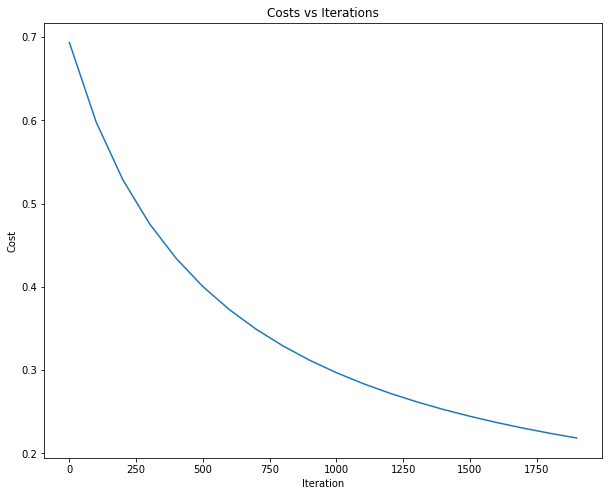

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(iterations,costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Costs vs Iterations')

#Test on test set

In [99]:
len(test_x)

2000

In [100]:
len(test_y)

2000

In [101]:
#convert text x to feature matrix

In [104]:
X_test=np.zeros((len(test_x),3))
for i in range(X_test.shape[0]):
  X_test[i,:] = feature(test_x[i],freqs)

In [105]:
X_test.shape

(2000, 3)

In [106]:
X_test

array([[1.000e+00, 3.096e+03, 2.900e+02],
       [1.000e+00, 3.236e+03, 3.970e+02],
       [1.000e+00, 1.363e+03, 3.280e+02],
       ...,
       [1.000e+00, 2.600e+01, 3.717e+03],
       [1.000e+00, 3.400e+01, 3.719e+03],
       [1.000e+00, 8.230e+02, 1.719e+03]])

In [107]:
y_pred = 1/(1+np.exp(-np.dot(X_test,W)))

In [113]:
for i in range(y_pred.shape[0]):
  if y_pred[i,0] > 0.5:
    y_pred[i,0] = 1
  else:
    y_pred[i,0] = 0

In [114]:
y_pred.shape

(2000, 1)

In [115]:
counts=0
for i in range(y_pred.shape[0]):
  if y_pred[i,0] == test_y[i,0]:
    counts += 1

accuracy = counts/(y_pred.shape[0])

print(counts)
print(accuracy)

1963
0.9815


**Accuracy on test set is 98.15%**